<a href="https://colab.research.google.com/github/takashi4233/ToDoList/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データセット取得

In [1]:
from tensorflow.python.keras.datasets import cifar10
from keras.utils import to_categorical

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
y_train,y_test = to_categorical(y_train,10),to_categorical(y_test,10)


Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


必要なライブラリ読み込み

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

学習モデル作成

In [0]:
model = Sequential([
                    Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    MaxPool2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    MaxPool2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(units=10,activation='softmax')  
])

学習モデルコンパイル

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

学習

In [0]:
# Epoch回数
epochs = 20
# バッチサイズ
batch_size = 16
# 学習
history = model.fit(x_train, y_train, validation_split=0.25, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
2344/2344 [==============================] - 23s 10ms/step - loss: 0.7814 - accuracy: 0.7236 - val_loss: 0.7663 - val_accuracy: 0.7362
Epoch 2/20
2344/2344 [==============================] - 23s 10ms/step - loss: 0.7396 - accuracy: 0.7416 - val_loss: 0.7973 - val_accuracy: 0.7301
Epoch 3/20
2344/2344 [==============================] - 23s 10ms/step - loss: 0.7083 - accuracy: 0.7530 - val_loss: 0.7443 - val_accuracy: 0.7454
Epoch 4/20
2344/2344 [==============================] - 25s 11ms/step - loss: 0.6746 - accuracy: 0.7642 - val_loss: 0.7123 - val_accuracy: 0.7550
Epoch 5/20
2344/2344 [==============================] - 24s 10ms/step - loss: 0.6457 - accuracy: 0.7729 - val_loss: 0.7259 - val_accuracy: 0.7550
Epoch 6/20
2344/2344 [==============================] - 23s 10ms/step - loss: 0.6297 - accuracy: 0.7790 - val_loss: 0.7435 - val_accuracy: 0.7510
Epoch 7/20
2344/2344 [==============================] - 26s 11ms/step - loss: 0.6096 - accuracy: 0.7857 - val_loss: 0.7268 -

学習結果描画

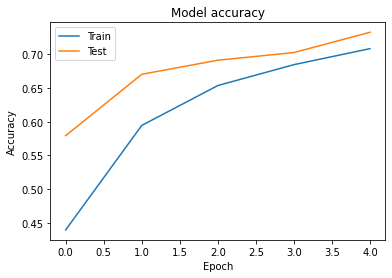

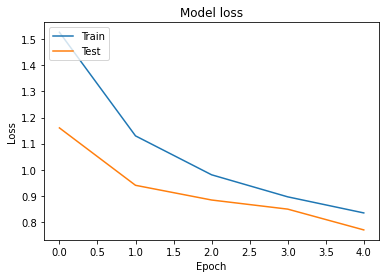

In [7]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

評価

In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7950 - accuracy: 0.7235


[0.7949766516685486, 0.7235000133514404]

テストデータ検証

https://pbs.twimg.com/media/CZpyQOFUUAEbAa4.jpg
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15922  100 15922    0     0   204k      0 --:--:-- --:--:-- --:--:--  204k
この画像はairplaneです.


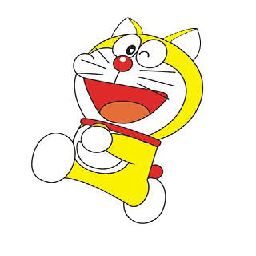

In [45]:
url = "https://pbs.twimg.com/media/CZpyQOFUUAEbAa4.jpg"

fetch_img_ary(url)

In [0]:
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
from tensorflow.python.keras.applications.vgg16 import preprocess_input
import numpy as np
def fetch_img_ary(url,img_name="tmp.jpg"):
  print (url)
  !curl -o {img_name} {url}
  img_show = load_img(img_name,target_size=(256,256))
  img = load_img(img_name,target_size=(32,32))
  img2 = img_to_array(img)
  img2 = preprocess_input(img2)
  arr_input = np.stack([img2])
  p = model.predict(arr_input)
  CIFAR10_LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 
  print (f"この画像は{ CIFAR10_LABELS[np.argmax(p)] }です.")
  display(img_show)

In [25]:
!ls

img_name  sample_data  tmp.jpg
